In [1]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities, girvan_newman, modularity
from sklearn.cluster import SpectralClustering
import cProfile
import io
from contextlib import redirect_stdout

prof = cProfile.Profile()

# Community Detection

In [2]:
G = nx.read_gml("karate.gml", label=None)

## Statistics

In [3]:
# Number of nodes
n = G.number_of_nodes

# Number of edges
e = G.number_of_edges

# Average path length
p = nx.average_shortest_path_length(G)

# Average clustering coefficient
c = nx.average_clustering(G)

## Community Detection

### Girvan-Newman

In [4]:
com = girvan_newman(G)
gn = tuple(sorted(c) for c in next(com))

### Modularity

In [106]:
mod = greedy_modularity_communities(G)

### Spectral

In [108]:
# Find clusters.
adj_mat = nx.to_numpy_matrix(G)
sc = SpectralClustering(2, affinity='precomputed', n_init=100)
sc.fit(adj_mat)

# Convert Scikit form to set form.
labels = sc.labels_
spectral = {x: [] for x in set(labels)}
for idx, lbl in enumerate(labels):
    spectral[lbl].append(idx)

/Users/tazmilur/Academics/networks-colgate/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


### Metrics

In [36]:
# Number of communities
n_mod = len(mod)
n_gn = len(gn)
n_spectral = len(spectral.keys())

In [113]:
# Modularity score
modularity(G, mod)

0.3806706114398422

In [82]:
# Runtime
prof.enable()

# Enter your code here
for _ in range(100):
    girvan_newman(G)

prof.disable()
f = io.StringIO()
with redirect_stdout(f):
    prof.print_stats()
out = f.getvalue()
print(out)

         1510 function calls in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 1664545460.py:1(<cell line: 5>)
        1    0.000    0.000    0.000    0.000 1664545460.py:1(<cell line: 8>)
        1    0.000    0.000    0.000    0.000 4112078914.py:1(<cell line: 5>)
        1    0.000    0.000    0.000    0.000 4112078914.py:1(<cell line: 8>)
        1    0.000    0.000    0.000    0.000 574927993.py:1(<cell line: 5>)
        1    0.000    0.000    0.000    0.000 574927993.py:1(<cell line: 8>)
     1300    0.000    0.000    0.000    0.000 centrality.py:8(girvan_newman)
        8    0.000    0.000    0.000    0.000 codeop.py:149(__call__)
       16    0.000    0.000    0.000    0.000 compilerop.py:174(extra_flags)
        8    0.000    0.000    0.000    0.000 contextlib.py:102(__init__)
        8    0.000    0.000    0.000    0.000 contextlib.py:130(__enter__)
        8   

## Representative Network

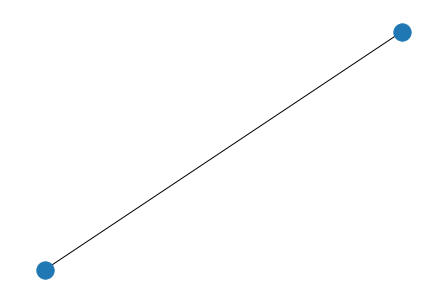

In [20]:
nodes = list(range(len(gn)))
G_prime = nx.Graph()

for i in nodes:
    edges = set()
    for n in gn[i]:
        edges.update([x for _, x in G.edges(n)])
    edges = edges - set(gn[i])

    rep_edges = set()
    for item in edges:
        for idx, x in enumerate(gn):
            if item in x:
                rep_edges.add(idx)
    
    y = [(i, x) for x in rep_edges]
    G_prime.add_edges_from(y)

nx.draw(G_prime)
    